In [16]:
import plotly.figure_factory as ff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import itertools

In [2]:
df = pd.read_stata('debitcard199598.dta')

In [5]:
df.shape

(564, 15)

In [6]:
df.head()

,spending1998,debit_card1998,cash_inventory,interest_rate,wealth,income,spending1995,num_of_banks,num_of_inhabitants,family_size,num_of_earners,average_age,geograph_area,householder_age,householder_education
0,1000.0,0 (No),1000.0,4.823153,1.575000e+06,64867.558594,3000.0,9.0,">20,000 & <=40,000",7,4.0,>30 & <=40,South and Islands,>50 & <=65,elementary school
1,1100.0,1 (Yes),500.0,4.925455,4.127469e+05,61375.425781,1200.0,2.0,">40,000 & <=500,000",2,2.0,>40 & <=50,North,>50 & <=65,elementary school
2,2000.0,1 (Yes),500.0,5.374096,1.030000e+05,40428.539062,2000.0,11.0,">20,000 & <=40,000",4,3.0,<=30,North,>40 & <=50,bachelors degree
3,1500.0,0 (No),900.0,4.925455,2.001000e+05,40283.109375,900.0,17.0,">20,000 & <=40,000",1,1.0,>65,North,>65,elementary school
4,1000.0,0 (No),500.0,5.438059,5.802000e+05,33112.640625,1000.0,4.0,"<=20,000",2,2.0,>65,North,>50 & <=65,elementary school


In [7]:
# Summary statistics

df.describe()

,spending1998,cash_inventory,interest_rate,wealth,income,spending1995,num_of_banks,family_size,num_of_earners
count,564.000000,564.000000,564.000000,5.640000e+02,564.000000,564.000000,564.000000,564.000000,564.000000
mean,1764.379395,903.315613,5.434823,2.711543e+05,43990.519531,1843.812012,35.803192,2.849291,1.794326
std,820.924316,643.385620,0.355467,3.285239e+05,24880.988281,764.336792,101.736565,1.308661,0.804232
min,150.000000,0.000000,4.533160,-4.000000e+03,-945.229431,300.000000,1.000000,1.000000,1.000000
25%,1200.000000,500.000000,5.215502,5.750000e+04,28334.531250,1300.000000,4.000000,2.000000,1.000000
50%,1600.000000,700.000000,5.436785,2.000000e+05,38457.875000,1800.000000,13.000000,3.000000,2.000000
75%,2000.000000,1000.000000,5.726669,3.416250e+05,53294.861328,2000.000000,27.000000,4.000000,2.000000
max,6500.000000,5000.000000,6.080345,2.416200e+06,235490.734375,5000.000000,900.000000,7.000000,5.000000


In [8]:
# EDA

pandas_profiling.ProfileReport(df)

/Users/bassim/anaconda3/lib/python3.6/site-packages/pandas_profiling/describe.py:404: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



Number of variables,15
Number of observations,564
Total Missing (%),0.0%
Total size in memory,29.1 KiB
Average record size in memory,52.8 B
Numeric,9
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,0


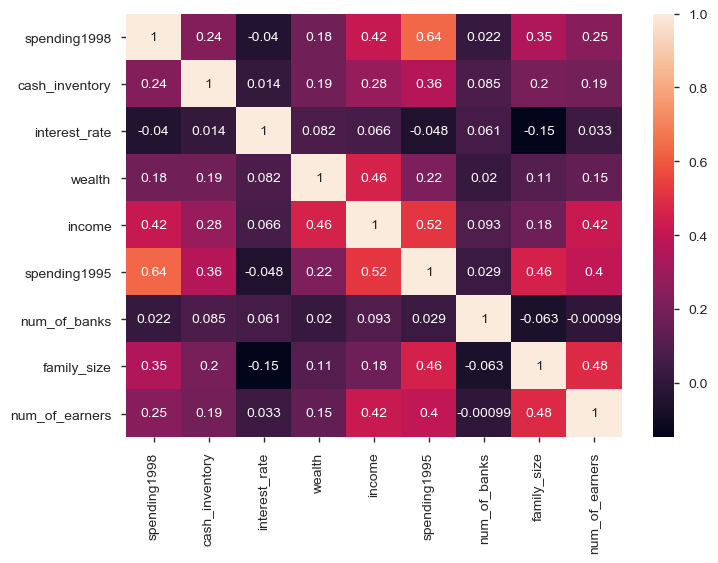

In [10]:
# correlation

sns.heatmap(df.corr(),annot=True)

In [27]:
cols = [x for x in df.select_dtypes(include=np.number).columns if x!='debit_card1998']

In [29]:
combs = list(itertools.combinations(cols, 2))

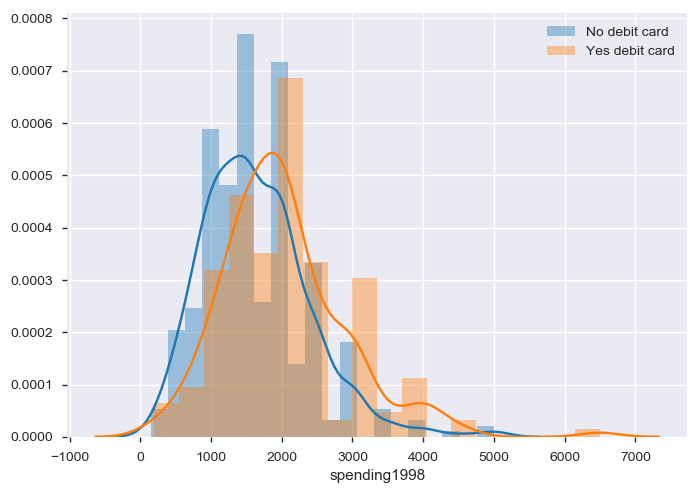

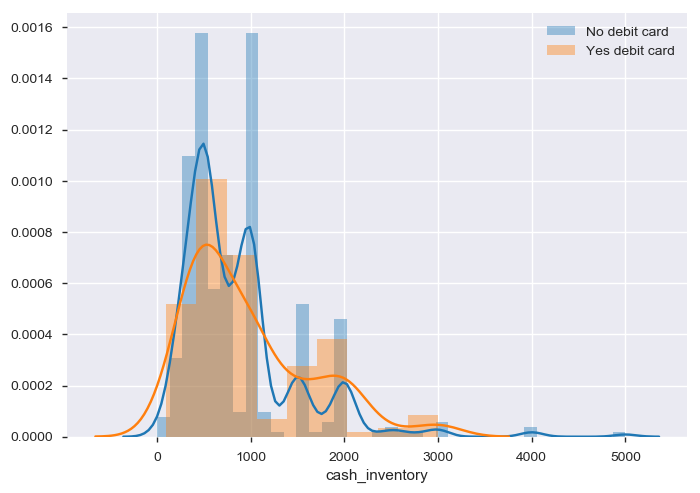

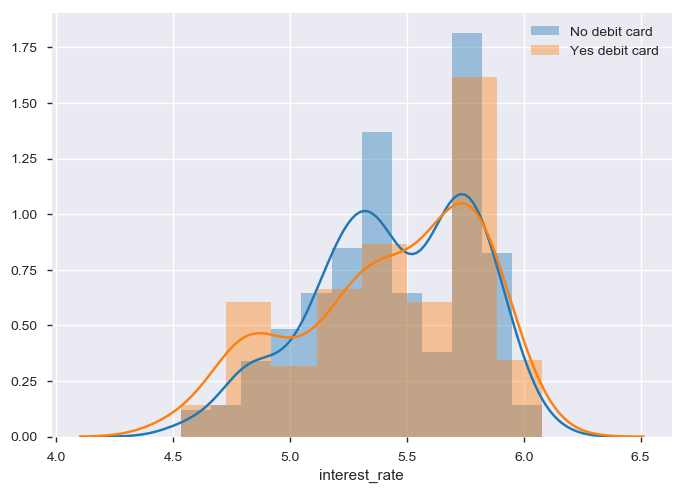

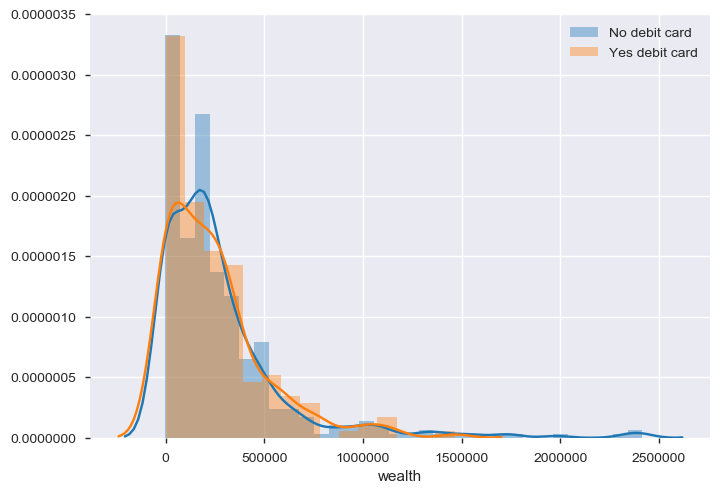

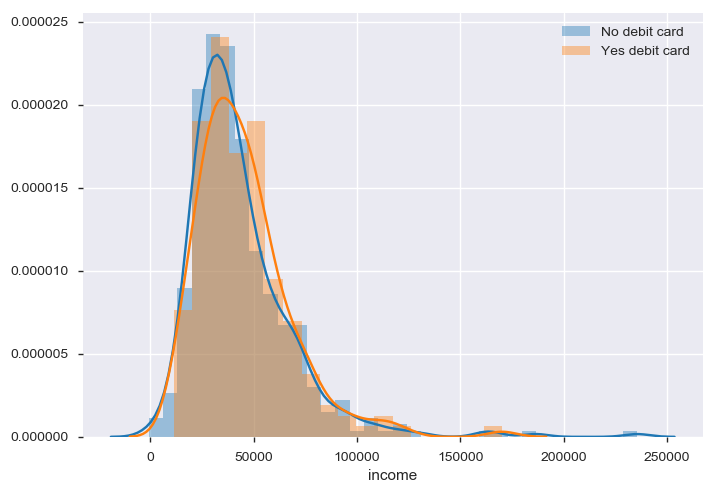

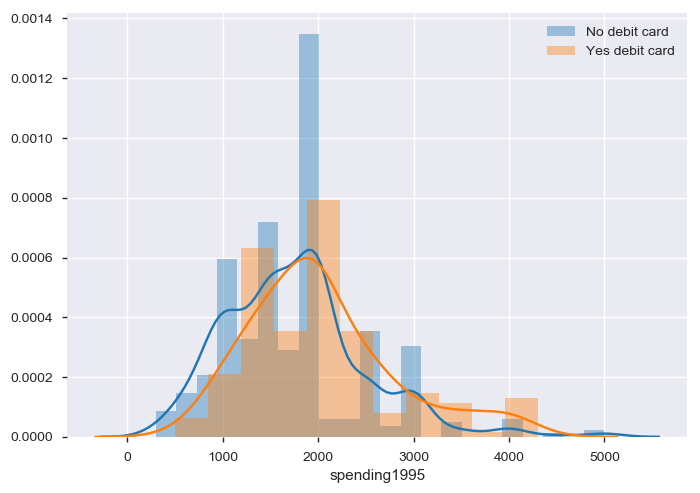

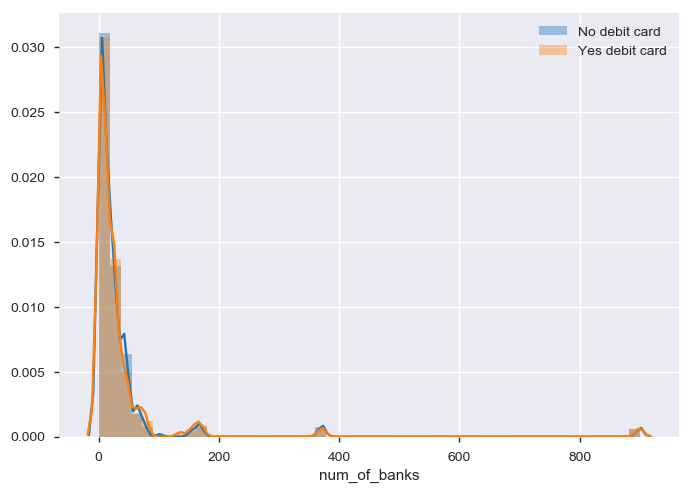

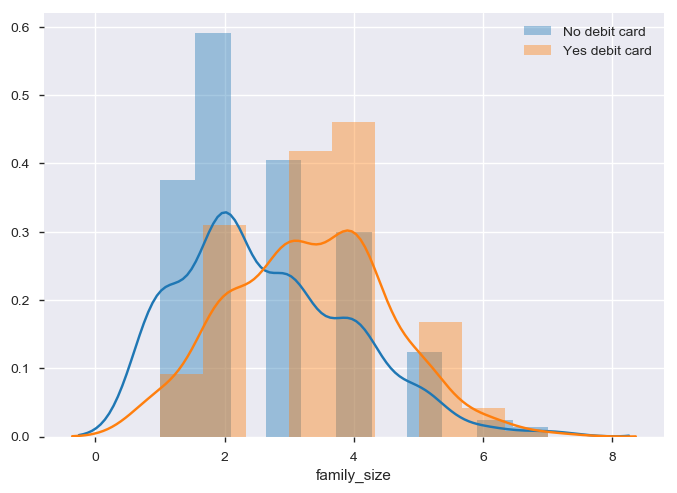

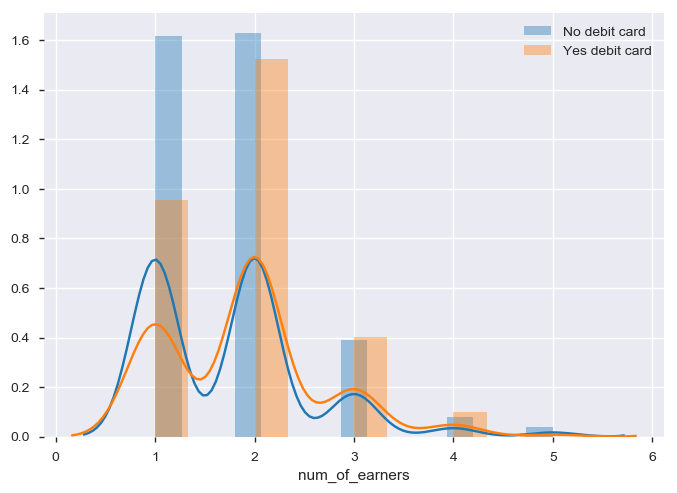

In [41]:
# distribution comparison numerical columns

for val in cols:
    sns.distplot(df[df['debit_card1998']=='0 (No)'][val],label='No debit card')
    sns.distplot(df[df['debit_card1998']=='1 (Yes)'][val],label='Yes debit card')
    plt.legend()
    plt.show()

In [45]:
cat_cols = [x for x in df.columns if x not in cols+['debit_card1998']]

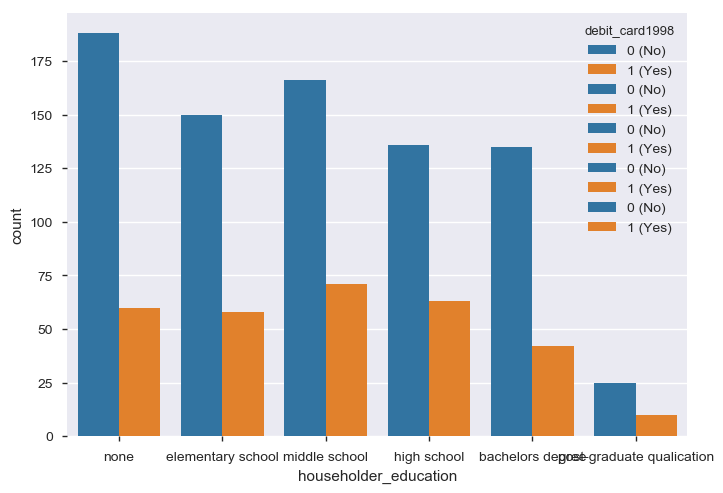

In [47]:
# categorical columns

for val in cat_cols:
    sns.countplot(df[val],hue=df['debit_card1998'])
    plt.legend()

/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



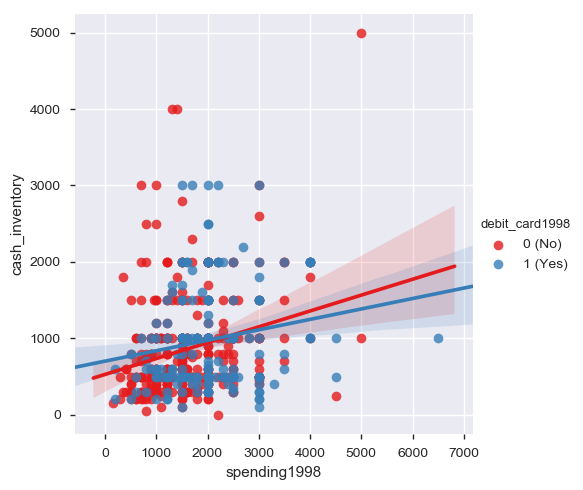

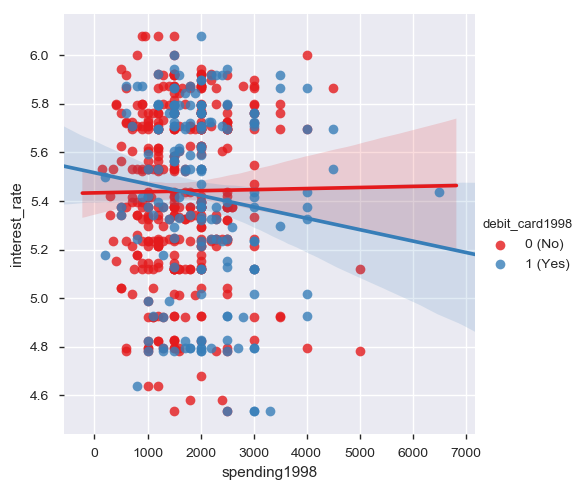

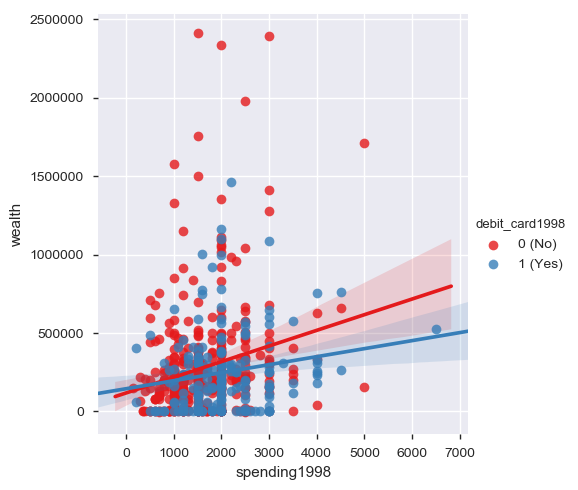

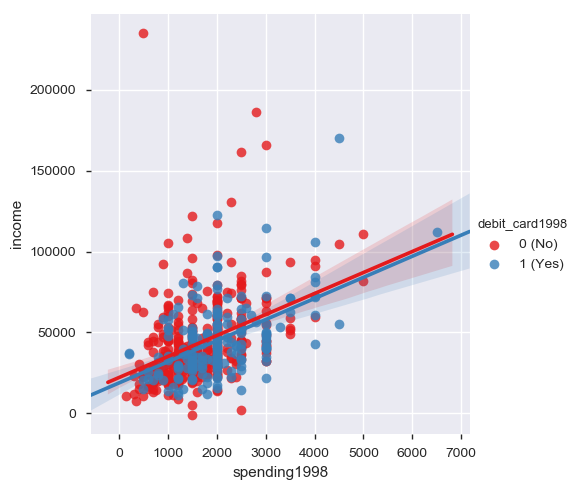

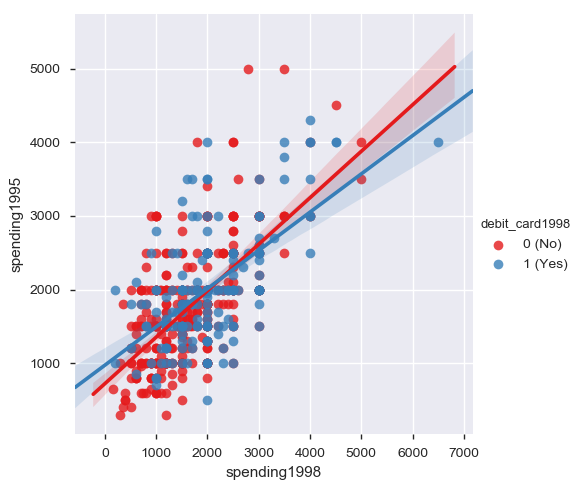

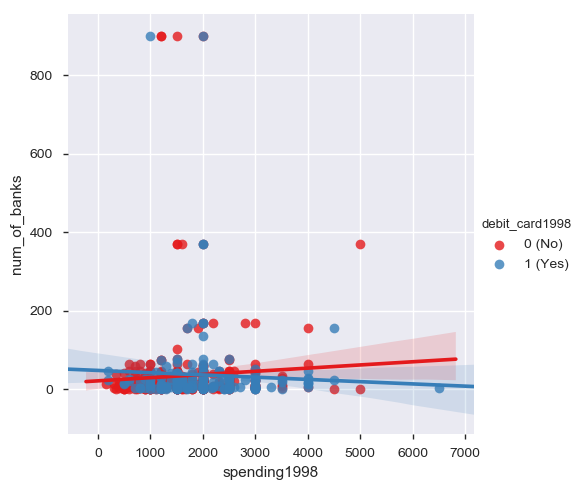

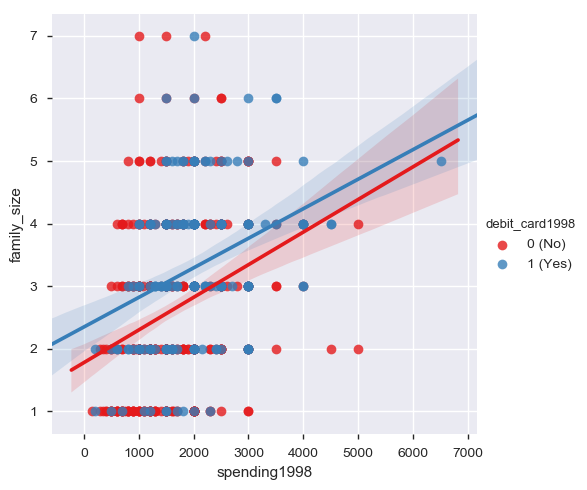

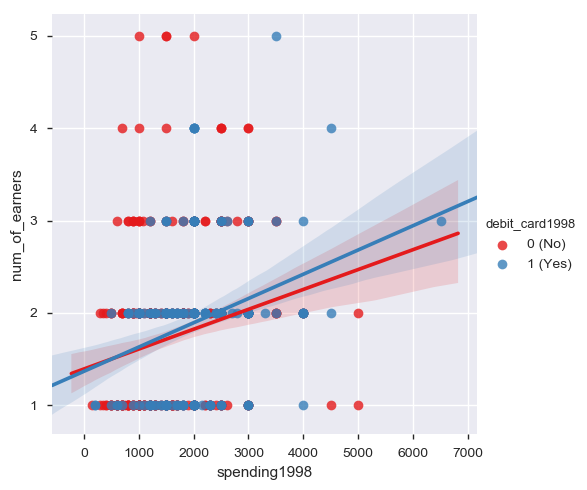

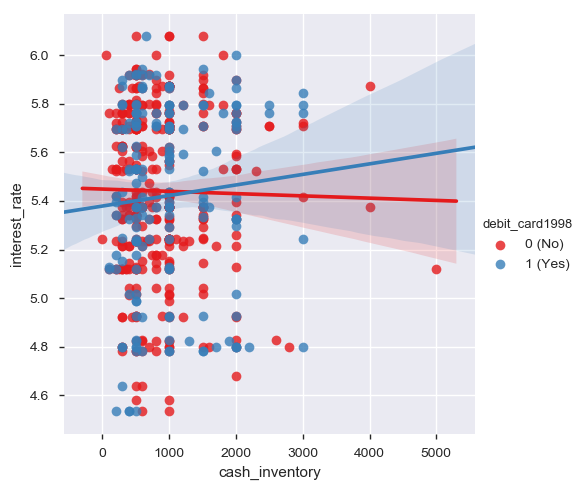

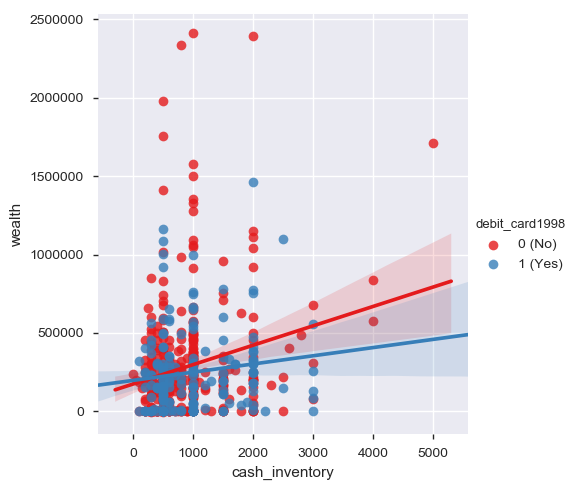

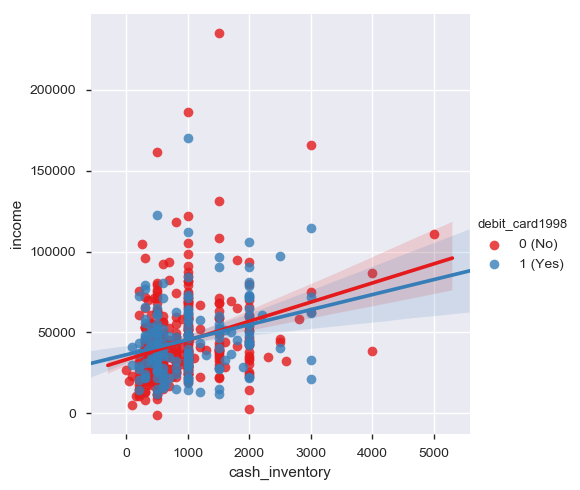

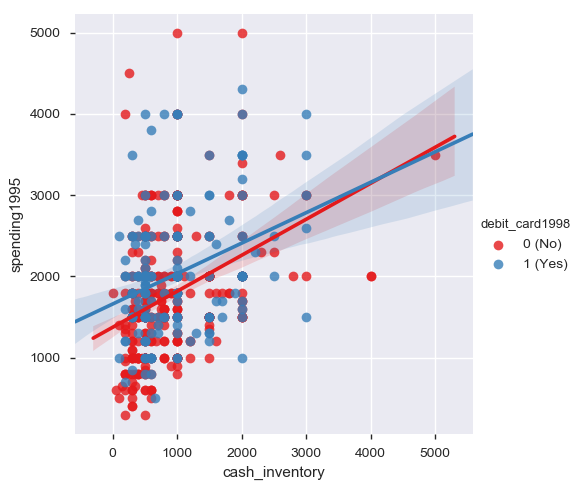

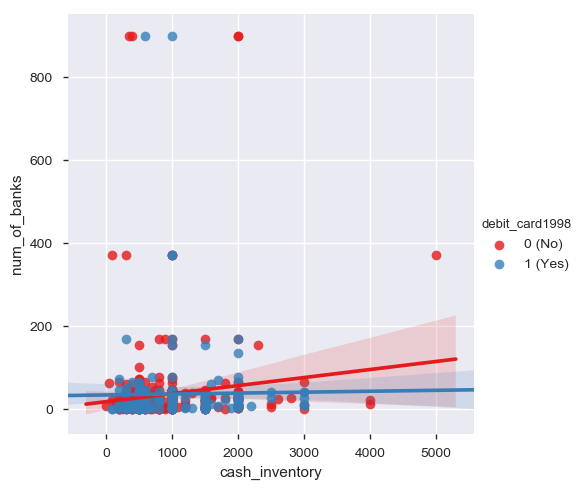

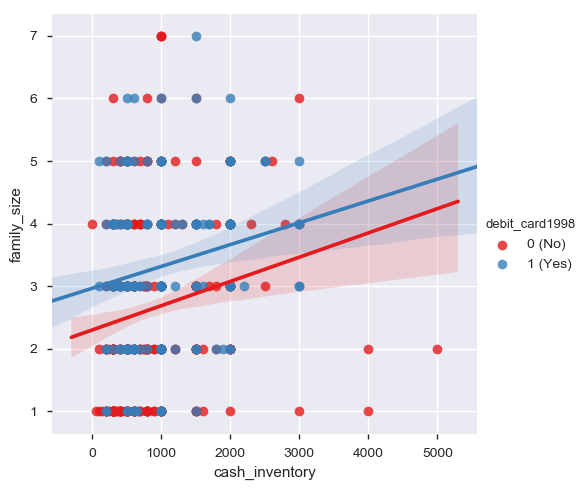

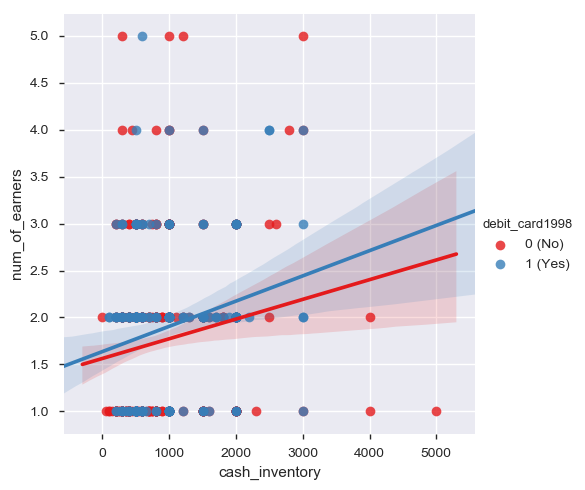

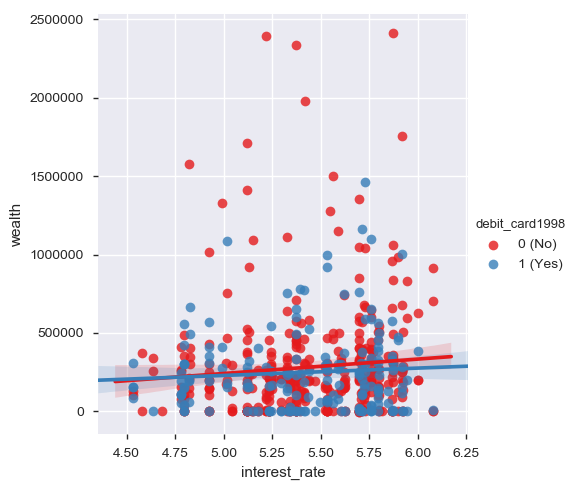

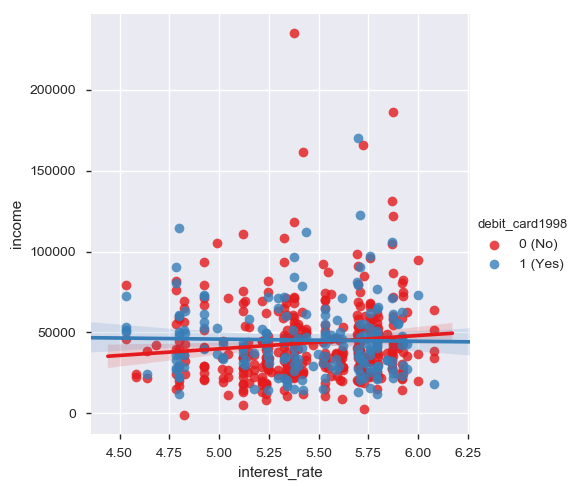

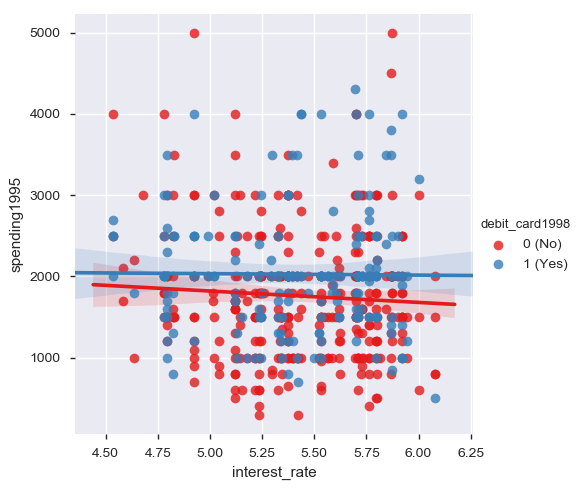

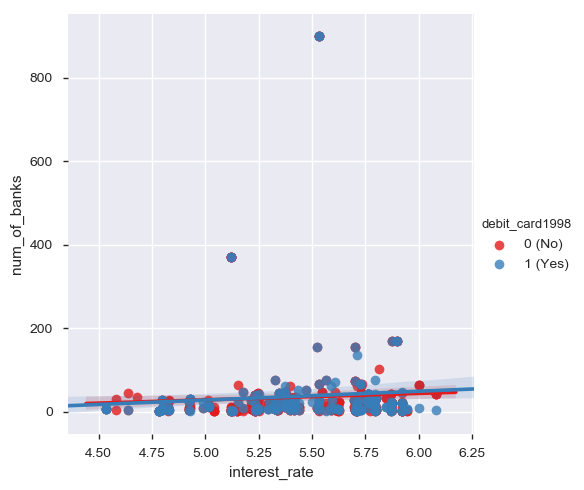

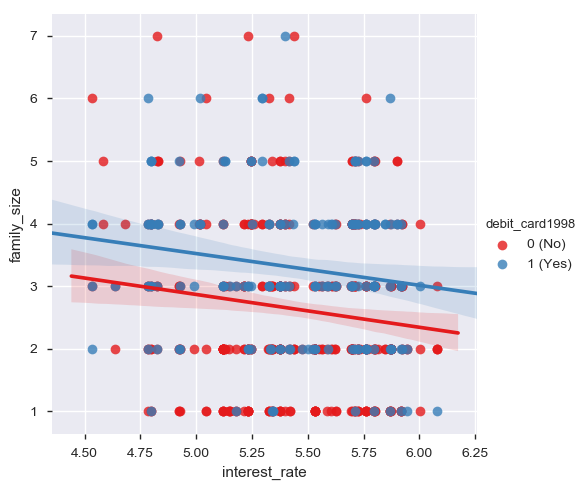

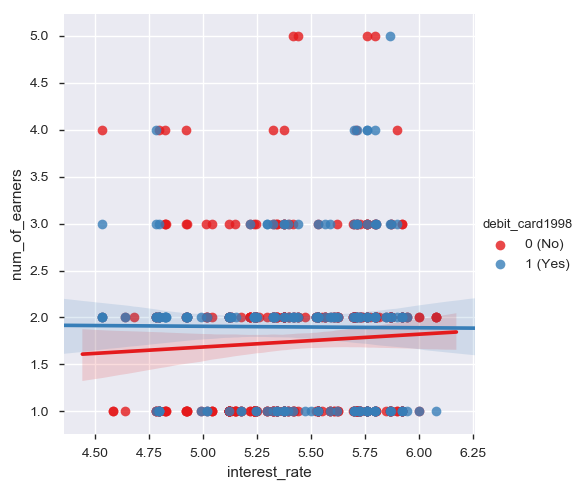

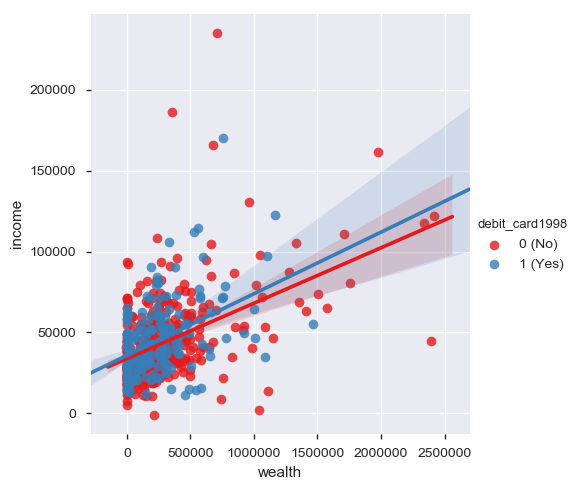

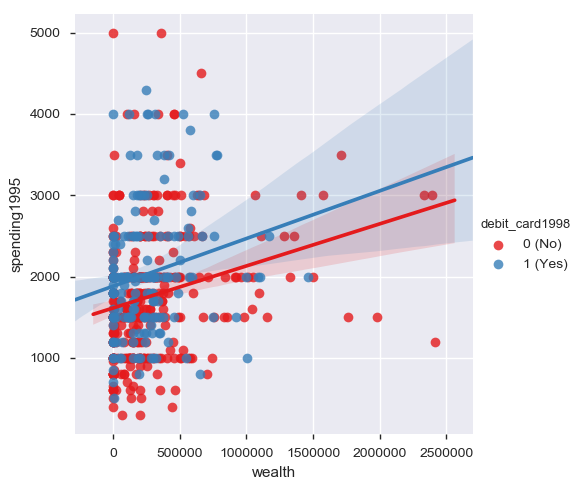

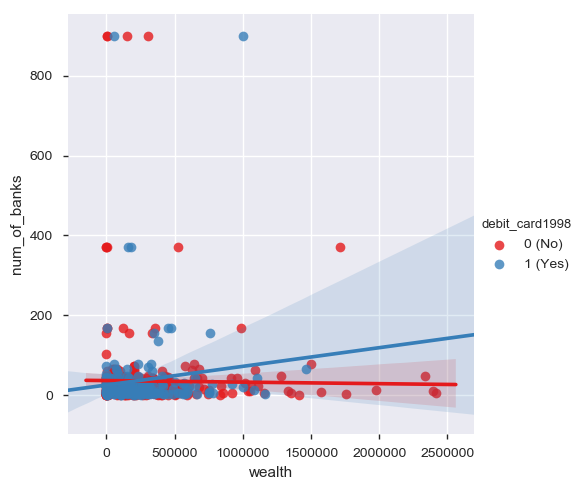

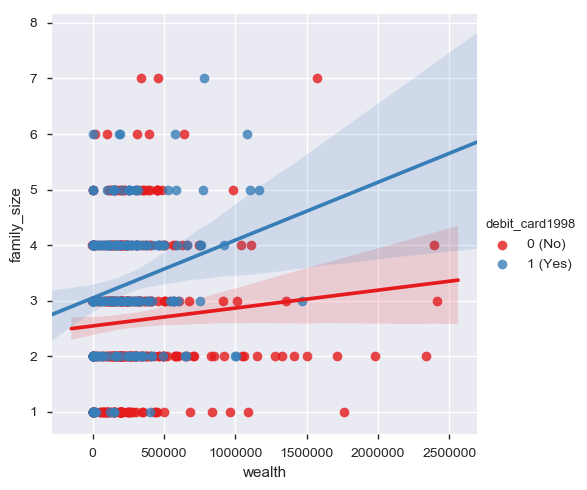

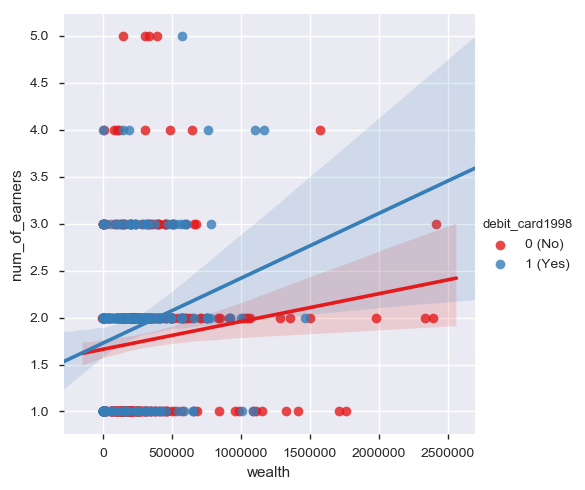

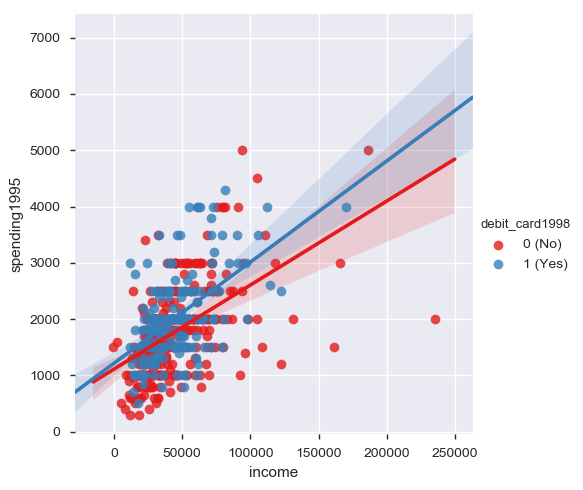

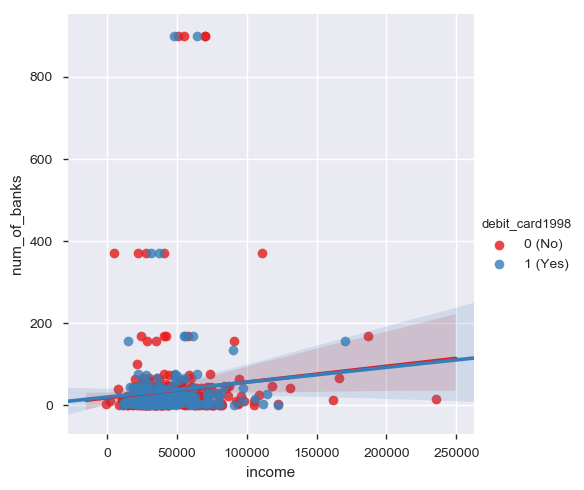

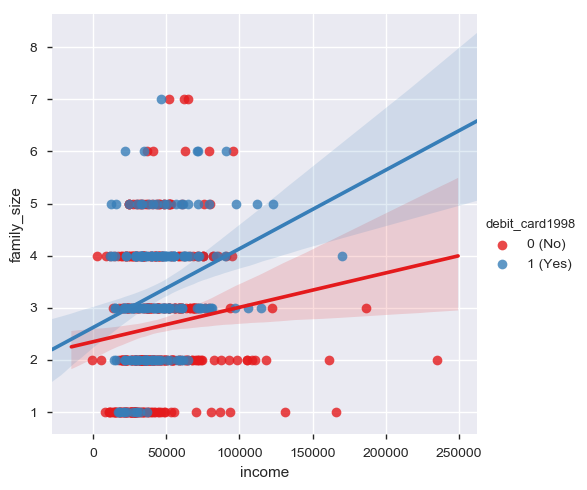

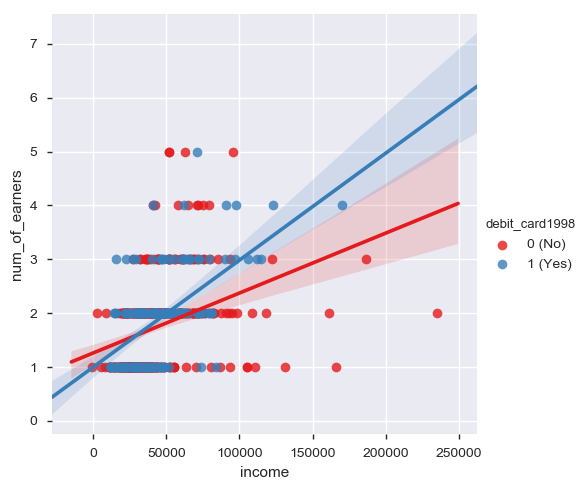

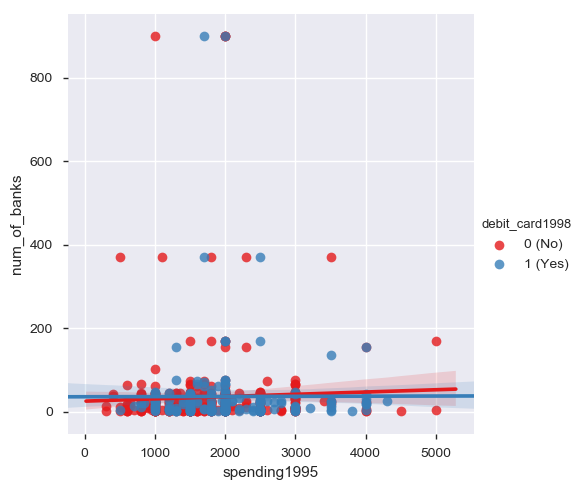

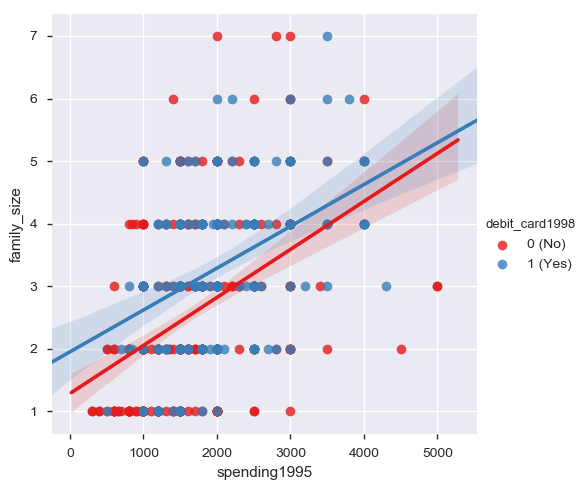

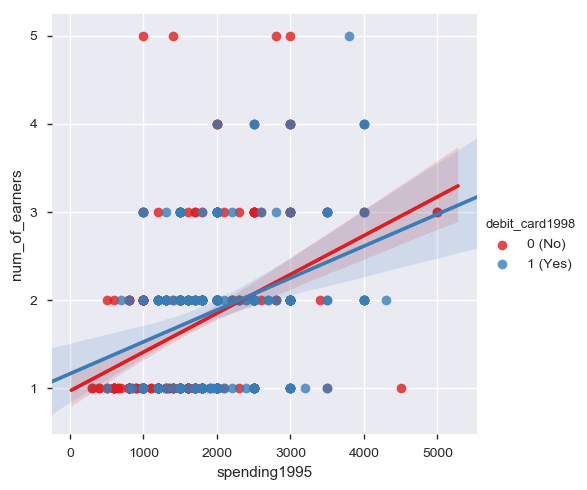

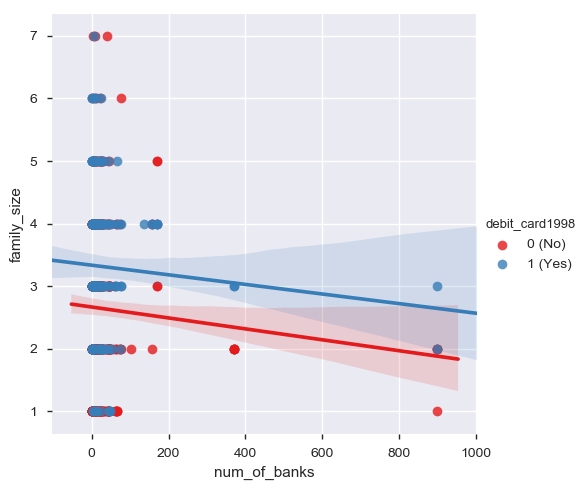

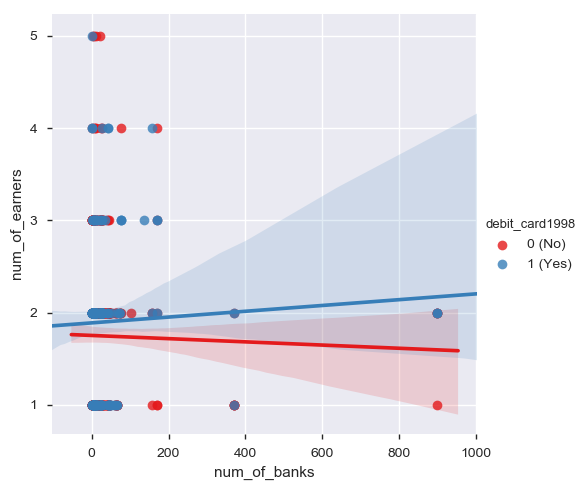

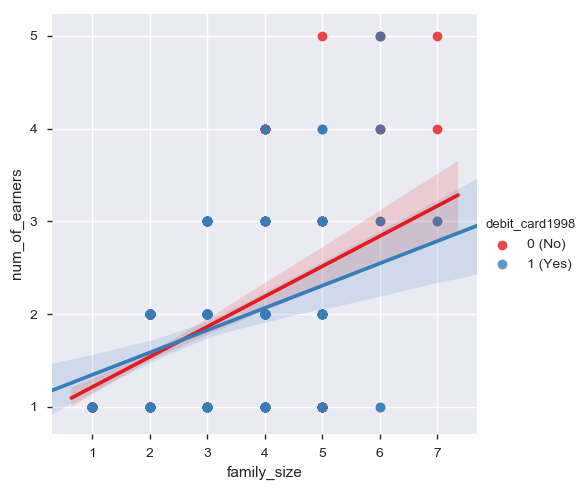

In [30]:
# numerical columns

for val in combs:
    sns.lmplot(x=val[0], y=val[1], hue="debit_card1998", data=df, palette="Set1")